# Lending Club Case Study

####  Assignment Brief:

You work for a consumer finance company Lending Club which specialises in lending various types of loans to urban customers. This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. When a person applies for a loan, there are two types of decisions that could be taken by the company:

1. Loan accepted: If the company approves the loan, there are 3 possible scenarios described below:

Fully paid: Applicant has fully paid the loan (the principal and the interest rate)

Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan

2. Loan rejected: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)


The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

In [2]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Ignore warnings due to version problems
import warnings
warnings.filterwarnings('ignore')


In [14]:
#loading the data
df=pd.read_csv("loan.csv")

### Understanding the data

In [4]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
#info about the dataset
df.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39717 non-null  int64  
 1   member_id                       39717 non-null  int64  
 2   loan_amnt                       39717 non-null  int64  
 3   funded_amnt                     39717 non-null  int64  
 4   funded_amnt_inv                 39717 non-null  float64
 5   term                            39717 non-null  object 
 6   int_rate                        39717 non-null  object 
 7   installment                     39717 non-null  float64
 8   grade                           39717 non-null  object 
 9   sub_grade                       39717 non-null  object 
 10  emp_title                       37258 non-null  object 
 11  emp_length                      38642 non-null  object 
 12  home_ownership                 

In [6]:
#shape of dataset
df.shape

(39717, 111)

In [7]:
#identifying the target variable
#out target variable is loan_status which tells us that if a person will default or not
df['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [8]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   id                              int64  
 1   member_id                       int64  
 2   loan_amnt                       int64  
 3   funded_amnt                     int64  
 4   funded_amnt_inv                 float64
 5   term                            object 
 6   int_rate                        object 
 7   installment                     float64
 8   grade                           object 
 9   sub_grade                       object 
 10  emp_title                       object 
 11  emp_length                      object 
 12  home_ownership                  object 
 13  annual_inc                      float64
 14  verification_status             object 
 15  issue_d                         object 
 16  loan_status                     object 
 17  pymnt_plan                    

In [9]:
#understanding the data types of each entity
df.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

In [10]:
#understanding the term variable
print(df['term'].dtypes)
df['term'].value_counts()

object


 36 months    29096
 60 months    10621
Name: term, dtype: int64

In [11]:
#understanding the loan_amnt
print(df['loan_amnt'].dtypes)
df['loan_amnt'].describe()

int64


count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [12]:
#we see that interest rate is object we can convert it to float

df['int_rate']= df['int_rate'].apply(lambda x:float(x.split('%')[0]))
df.int_rate.describe()

count    39717.000000
mean        12.021177
std          3.724825
min          5.420000
25%          9.250000
50%         11.860000
75%         14.590000
max         24.590000
Name: int_rate, dtype: float64

In [15]:
#understanding the grade column
print(df['grade'].dtype)
df['grade'].value_counts()

object


B    12020
A    10085
C     8098
D     5307
E     2842
F     1049
G      316
Name: grade, dtype: int64

In [16]:
#understanding the subgrade column
print(df['sub_grade'].dtype)
df['sub_grade'].value_counts()

object


B3    2917
A4    2886
A5    2742
B5    2704
B4    2512
C1    2136
B2    2057
C2    2011
B1    1830
A3    1810
C3    1529
A2    1508
D2    1348
C4    1236
C5    1186
D3    1173
A1    1139
D4     981
D1     931
D5     874
E1     763
E2     656
E3     553
E4     454
E5     416
F1     329
F2     249
F3     185
F4     168
F5     118
G1     104
G2      78
G4      56
G3      48
G5      30
Name: sub_grade, dtype: int64

In [17]:
#understanding the Annula income 
print(df['annual_inc'].dtype)
df['annual_inc'].describe()

float64


count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [18]:
#understanding the purpose of loan
print(df['purpose'].dtype)
df['purpose'].value_counts()

object


debt_consolidation    18641
credit_card            5130
other                  3993
home_improvement       2976
major_purchase         2187
small_business         1828
car                    1549
wedding                 947
medical                 693
moving                  583
vacation                381
house                   381
educational             325
renewable_energy        103
Name: purpose, dtype: int64

In [19]:
#understanding dti column
print(df['dti'].dtype)
df['dti'].describe()

float64


count    39717.000000
mean        13.315130
std          6.678594
min          0.000000
25%          8.170000
50%         13.400000
75%         18.600000
max         29.990000
Name: dti, dtype: float64

In [20]:
#understanding the employment length
#we can replace the less than 1 year as 1 year and 10+ years as 10 years
df=df.replace(to_replace ="< 1 year",
                 value ="1 year")
df=df.replace(to_replace='10+ years',value='10 years')

In [21]:
df['emp_length'].value_counts(dropna=False)

10 years    8879
1 year      7823
2 years     4388
3 years     4095
4 years     3436
5 years     3282
6 years     2229
7 years     1773
8 years     1479
9 years     1258
NaN         1075
Name: emp_length, dtype: int64

In [22]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   id                              int64  
 1   member_id                       int64  
 2   loan_amnt                       int64  
 3   funded_amnt                     int64  
 4   funded_amnt_inv                 float64
 5   term                            object 
 6   int_rate                        float64
 7   installment                     float64
 8   grade                           object 
 9   sub_grade                       object 
 10  emp_title                       object 
 11  emp_length                      object 
 12  home_ownership                  object 
 13  annual_inc                      float64
 14  verification_status             object 
 15  issue_d                         object 
 16  loan_status                     object 
 17  pymnt_plan                    

In [23]:
#understanding date of issuing loan
print(df['issue_d'].dtype)
df.issue_d.value_counts()


object


Dec-11    2260
Nov-11    2223
Oct-11    2114
Sep-11    2063
Aug-11    1928
Jul-11    1870
Jun-11    1827
May-11    1689
Apr-11    1562
Mar-11    1443
Jan-11    1380
Feb-11    1297
Dec-10    1267
Oct-10    1132
Nov-10    1121
Jul-10    1119
Sep-10    1086
Aug-10    1078
Jun-10    1029
May-10     920
Apr-10     827
Mar-10     737
Feb-10     627
Nov-09     602
Dec-09     598
Jan-10     589
Oct-09     545
Sep-09     449
Aug-09     408
Jul-09     374
Jun-09     356
May-09     319
Apr-09     290
Mar-09     276
Feb-09     260
Jan-09     239
Mar-08     236
Dec-08     223
Nov-08     184
Feb-08     174
Jan-08     171
Apr-08     155
Oct-08      96
Dec-07      85
Jul-08      83
Aug-08      71
May-08      71
Jun-08      66
Oct-07      47
Nov-07      37
Aug-07      33
Sep-08      32
Jul-07      30
Sep-07      18
Jun-07       1
Name: issue_d, dtype: int64

In [24]:
#converting the issue_d from object to datetime data type
df.issue_d = pd.to_datetime(df.issue_d, format='%b-%y')

In [25]:
#understanding the home ownership variale
df['home_ownership'].value_counts()

RENT        18899
MORTGAGE    17659
OWN          3058
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

In [26]:
#understanding the verification status 
df['verification_status'].value_counts()

Not Verified       16921
Verified           12809
Source Verified     9987
Name: verification_status, dtype: int64

### Data Cleaning

In [27]:
#check if there is a column which is completly empty(null)
print(df.isnull().values.all(axis=0).sum())


54


In [28]:
#dropping all 54 columns where all the values are null

df=df.dropna(how='all', axis=1)

In [29]:
#dataframe's shape after dropping null columns and rows
df.shape

(39717, 57)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          39717 non-null  int64         
 1   member_id                   39717 non-null  int64         
 2   loan_amnt                   39717 non-null  int64         
 3   funded_amnt                 39717 non-null  int64         
 4   funded_amnt_inv             39717 non-null  float64       
 5   term                        39717 non-null  object        
 6   int_rate                    39717 non-null  float64       
 7   installment                 39717 non-null  float64       
 8   grade                       39717 non-null  object        
 9   sub_grade                   39717 non-null  object        
 10  emp_title                   37258 non-null  object        
 11  emp_length                  38642 non-null  object    

In [31]:
#dropping duplicate values if any
df.drop_duplicates()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07,78.42,A,A4,...,NaN,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28,275.38,C,C1,...,NaN,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07,156.84,A,A4,...,NaN,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43,155.38,A,A2,...,NaN,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


In [32]:
#percentage of missing values column wise
(df.isnull().sum())/df.shape[0]*100

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [33]:
#we find that mths_since_last_record and next_payment_d is having more than 90% missing data, so we will drop them
df=df.drop(['mths_since_last_record','next_pymnt_d'],axis=1)

In [34]:
df.shape

(39717, 55)

In [35]:
#find the rows where the percentage of missing values is greater than 90
df[((df.isnull().sum(axis=1))/df.shape[1]*100) > 90]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens


In [36]:
#there are 3 types of variables:
#1. Related to applicant - age, occupation etc.
#2. Loan characteristics - loan_amt, interest_rate, purpose etc
#3. customer behaviour variable which are generated after the loan is approved(we do not need them) - balance,
#next payment due etc.

#we will identify the customer behaviour variables and drop them
customer_behaviour_variables=['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_amnt','last_credit_pull_d','application_type','last_pymnt_d']

In [37]:
df=df.drop(customer_behaviour_variables, axis=1)

In [38]:
df.shape

(39717, 34)

In [39]:
# funded_amnt is the amount asked by lender
#funded_amnt_inv is the amount agreed for the loan 
#these both variables are also not present at the time of application so we willdrop them as well

df=df.drop(['funded_amnt','funded_amnt_inv'],axis=1)

In [40]:
df.shape

(39717, 32)

In [41]:
#we are interested to know hwo all were able to fully pay their loan and who all were charged off
#we are not getting any info from "current" loan_status so we will drop those records
df=df[~(df['loan_status']=='Current')]

In [42]:
df['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

In [43]:
#percentage of missing values column wise
(df.isnull().sum())/df.shape[0]*100

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.185033
emp_length                     2.677761
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.472717
purpose                        0.000000
title                          0.028514
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000
mths_since_last_delinq        64.559193
initial_list_status            0.000000


In [44]:

#understanding the employee title and treating the missing values
df['emp_title'].value_counts(dropna=False)
#we found that the mode of employee title is "US Army" so we will replace the missing values with it. 

NaN                       2386
US Army                    131
Bank of America            107
IBM                         65
AT&T                        57
                          ... 
Trish South Management       1
Kern Health Systems          1
EnerNOC                      1
Car Zone                     1
Henry Ford Health            1
Name: emp_title, Length: 28028, dtype: int64

In [45]:
#filling the null rows with the mode ("US Army") as it is a categorical variable.
df['emp_title'] = df['emp_title'].fillna('US Army')

In [46]:

#understanding and filling the null values of employment length 
df['emp_length'].value_counts(dropna=False)

10 years    8488
1 year      7677
2 years     4291
3 years     4012
4 years     3342
5 years     3194
6 years     2168
7 years     1711
8 years     1435
9 years     1226
NaN         1033
Name: emp_length, dtype: int64

In [47]:
#imputing the missing values of employment length with the mode(10 years) as it is categorical variable.
df['emp_length']=df['emp_length'].fillna("10 years")
df['emp_length'].isnull().sum()

0

In [48]:
#understanding the desc variable
#desc gives us the description about the loan which may not be very beneficial as we already get the breif info from purpose column
#so dropping the  "desc"column
df=df.drop(['desc'],axis=1)

In [49]:
#understanding purpose column
df['purpose'].value_counts()

debt_consolidation    18055
credit_card            5027
other                  3865
home_improvement       2875
major_purchase         2150
small_business         1754
car                    1499
wedding                 926
medical                 681
moving                  576
vacation                375
house                   367
educational             325
renewable_energy        102
Name: purpose, dtype: int64

In [50]:
#understanding the title column
df['title'].value_counts()

Debt Consolidation                      2090
Debt Consolidation Loan                 1620
Personal Loan                            641
Consolidation                            491
debt consolidation                       478
                                        ... 
Evicted                                    1
Credit Card  Refinance                     1
Ayoung48                                   1
Land Improvement Loan                      1
home improvement for retirement home       1
Name: title, Length: 19297, dtype: int64

In [51]:
#make the whole title to lower case
df['title']=df['title'].str.lower()

In [52]:
df['title'].value_counts()


debt consolidation                     2948
debt consolidation loan                1752
personal loan                           958
consolidation                           699
home improvement                        526
                                       ... 
refinancing lc loan, always on time       1
consolidate for 2012                      1
kitchen/bath updating                     1
pay off debt and start buisness           1
downpayment for dream home!               1
Name: title, Length: 17408, dtype: int64

In [53]:
#we see that there are lot of redundant categories such as "personal loan" and "personal"
#also we find that the title of the loan is the decription of the purpose of loan,so we will drop it
#we will drop "title" column
df=df.drop(['title'],axis=1)

In [54]:
#we see that more than 60%  data is missing in "mths_since_last_delinq", so we will drop them
df=df.drop(['mths_since_last_delinq'],axis=1)

In [55]:
#understanding "collections_12_mths_ex_med" variable
df['collections_12_mths_ex_med'].describe()


count    38521.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: collections_12_mths_ex_med, dtype: float64

In [56]:
#we found that all the values in "collections_12_mths_ex_med" are 0 , which does not gives us any insight, so drop it
df=df.drop(['collections_12_mths_ex_med'],axis=1)

In [57]:
#understanding "chargeoff_within_12_mths" variable
df['chargeoff_within_12_mths'].describe()

count    38521.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: chargeoff_within_12_mths, dtype: float64

In [58]:
#we found that all the values in "chargeoff_within_12_mths" are 0 , which does not gives us any insight, so drop it
df=df.drop(['chargeoff_within_12_mths'],axis=1)

In [59]:
#understanding "pub_rec_bankruptcies" data
df['pub_rec_bankruptcies'].describe()

count    37880.000000
mean         0.043479
std          0.204583
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: pub_rec_bankruptcies, dtype: float64

In [60]:
#imputing the missing values for "pub_rec_bankruptcies" with median
df.loc[np.isnan(df['pub_rec_bankruptcies']),['pub_rec_bankruptcies']]=df['pub_rec_bankruptcies'].median()

In [61]:
#understanding 'tax_liens' column
df['tax_liens'].describe()

count    38538.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: tax_liens, dtype: float64

In [62]:
#we found that all the values in "tax_liens" are 0 , which does not gives us any insight, so drop it
df=df.drop(['tax_liens'],axis=1)

In [63]:
#find the percentage of missing value column wise
(df.isnull().sum())/df.shape[0]*100

id                      0.0
member_id               0.0
loan_amnt               0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
sub_grade               0.0
emp_title               0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
pymnt_plan              0.0
url                     0.0
purpose                 0.0
zip_code                0.0
addr_state              0.0
dti                     0.0
initial_list_status     0.0
policy_code             0.0
acc_now_delinq          0.0
delinq_amnt             0.0
pub_rec_bankruptcies    0.0
dtype: float64

In [64]:
df.shape

(38577, 26)

In [65]:
#understanding the installment column
df['installment'].describe()

count    38577.000000
mean       322.466318
std        208.639215
min         15.690000
25%        165.740000
50%        277.860000
75%        425.550000
max       1305.190000
Name: installment, dtype: float64

In [66]:
#understanding the "pymnt_plan" column
df['pymnt_plan'].value_counts()

n    38577
Name: pymnt_plan, dtype: int64

In [67]:
#we find that 'pymnt_plan' has same value for all the rows which is not beneficial for analysis, so dropping it
df=df.drop(['pymnt_plan'],axis=1)

In [68]:
df.shape

(38577, 25)

In [69]:
#understanding the'url' column
pd.options.display.max_colwidth = 50
df['url'].head()

0    https://lendingclub.com/browse/loanDetail.acti...
1    https://lendingclub.com/browse/loanDetail.acti...
2    https://lendingclub.com/browse/loanDetail.acti...
3    https://lendingclub.com/browse/loanDetail.acti...
5    https://lendingclub.com/browse/loanDetail.acti...
Name: url, dtype: object

In [70]:
#we find that "url" is having information about the link with the loan_id, so dropping it as it is not benefical for analusis
df=df.drop(['url'],axis=1)

In [71]:
#understanding the "zip_code"
df['zip_code'].value_counts()

#as we are not getting much information from zip code, so dropping the column
df=df.drop(['zip_code'],axis=1)

In [72]:

#understanding addr_state
df['addr_state'].value_counts()

CA    6949
NY    3698
FL    2781
TX    2659
NJ    1790
IL    1478
PA    1468
VA    1369
GA    1359
MA    1297
OH    1178
MD    1023
AZ     849
WA     818
CO     766
NC     750
CT     726
MI     704
MO     670
MN     605
NV     479
SC     459
WI     440
OR     435
AL     435
LA     427
KY     311
OK     287
KS     255
UT     252
AR     235
DC     211
RI     194
NM     183
WV     172
NH     166
HI     166
DE     113
MT      83
WY      80
AK      78
SD      62
VT      53
MS      19
TN      17
IN       9
ID       6
NE       5
IA       5
ME       3
Name: addr_state, dtype: int64

In [73]:
#understanding 'initial_list_status' column
df['initial_list_status'].value_counts()

f    38577
Name: initial_list_status, dtype: int64

In [74]:
#wefind that 'initial_list_status' is having same value in all the rows, so dropping it
df=df.drop(['initial_list_status'],axis=1)

In [75]:
df.shape

(38577, 22)

In [76]:
#understanding policy_code
df['policy_code'].value_counts()

1    38577
Name: policy_code, dtype: int64

In [77]:
#we find that 'policy_code' is having same value for all the rows, which is not beneficial, so dropping it
df=df.drop(['policy_code'],axis=1)

In [78]:
#understanding 'acc_now_delinq' column
df['acc_now_delinq'].value_counts()

0    38577
Name: acc_now_delinq, dtype: int64

In [79]:
#we find that 'acc_now_delinq' is having same value for all the rows, which is not beneficial, so dropping it
df=df.drop(['acc_now_delinq'],axis=1)

In [80]:
df.shape

(38577, 20)

In [81]:
df['delinq_amnt'].value_counts()

0    38577
Name: delinq_amnt, dtype: int64

In [82]:
#we find that 'delinq_amnt' is having same value for all the records, which is not beneficial, so dropping it
df=df.drop(['delinq_amnt'],axis=1)

In [83]:
#understanding 'pub_rec_bankruptcies' column
df['pub_rec_bankruptcies'].value_counts()

0.0    36935
1.0     1637
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    38577 non-null  int64         
 1   member_id             38577 non-null  int64         
 2   loan_amnt             38577 non-null  int64         
 3   term                  38577 non-null  object        
 4   int_rate              38577 non-null  float64       
 5   installment           38577 non-null  float64       
 6   grade                 38577 non-null  object        
 7   sub_grade             38577 non-null  object        
 8   emp_title             38577 non-null  object        
 9   emp_length            38577 non-null  object        
 10  home_ownership        38577 non-null  object        
 11  annual_inc            38577 non-null  float64       
 12  verification_status   38577 non-null  object        
 13  issue_d         

#### Derived Columns for Analysis

In [85]:
#taking out the month and year from issue_d(date of issue of loan)
df['issue_d_month'] = df['issue_d'].dt.month
df['issue_d_year'] = df['issue_d'].dt.year

In [86]:
#dropping issue_d column as we already have the month of issue and year of issue column
df=df.drop(['issue_d'],axis=1)

In [87]:
#annual income
df.annual_inc.describe().apply(lambda x: format(x, 'f'))

#categorising annual income into buckets that will be beneficial for further analysis
df['annual_inc_category'] = pd.cut(df['annual_inc'], [4000, 20000, 50000, 100000, 200000, 6000000],
                                   labels=['4000-20000', '20000-50000', '50000-100000', '100000-200000',
                                          '200000-6000000'])


In [88]:
#interest rate
df.int_rate.describe()

#categorising interest rate into buckets that will be beneficial for further analysis
df['int_rate_category'] = pd.cut(df['int_rate'], [5, 10, 15, 20, 25], labels=['5-10', '10-15', '15-20', '20-25'])

In [89]:
#loan amount
df.loan_amnt.describe().apply(lambda x: format(x, 'f'))

#categorising loan amount into buckets that will be beneficial for further analysis
df['loan_amnt_category'] = pd.cut(df['loan_amnt'], [500, 5000, 10000, 15000, 20000, 25000, 30000, 35000],
                                  labels=['500-5000', '5000-10000', '10000-15000', '15000-20000',
                                        '20000-25000','25000-30000','30000-35000'])

In [90]:
#debt to income
df.dti.describe()

#categorising dti into buckets that will be beneficial for further analysis
df['dti_category'] = pd.cut(df['dti'], [0, 5, 10, 15, 20, 25, 30], labels=['0-5','5-10','10-15','15-20','20-25','25-30'])

In [91]:
#installment amount
df['installment'].describe()

#categorising installment amount into buckets that will be beneficial for further analysis
df['installment_category'] = pd.cut(df['installment'], [0, 200, 400, 600, 800, 1305], 
                                   labels=['0-200','200-400','400-600','600-800','800+'])

In [92]:
#Deriving a column "default" to show that a person has defaulted the loan or not
df['default']= np.where(df['loan_status'] == 'Charged Off', 1, 0) 

In [93]:
df.head()

,id,member_id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,dti,pub_rec_bankruptcies,issue_d_month,issue_d_year,annual_inc_category,int_rate_category,loan_amnt_category,dti_category,installment_category,default
0,1077501,1296599,5000,36 months,10.65,162.87,B,B2,US Army,10 years,...,27.65,0.0,12,2011,20000-50000,10-15,500-5000,25-30,0-200,0
1,1077430,1314167,2500,60 months,15.27,59.83,C,C4,Ryder,1 year,...,1.00,0.0,12,2011,20000-50000,15-20,500-5000,0-5,0-200,1
2,1077175,1313524,2400,36 months,15.96,84.33,C,C5,US Army,10 years,...,8.72,0.0,12,2011,4000-20000,15-20,500-5000,5-10,0-200,0
3,1076863,1277178,10000,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10 years,...,20.00,0.0,12,2011,20000-50000,10-15,5000-10000,15-20,200-400,0
5,1075269,1311441,5000,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,...,11.20,0.0,12,2011,20000-50000,5-10,500-5000,10-15,0-200,0


In [94]:
df.shape

(38577, 26)

In [95]:
# we have these 26 columns and 38577 records which will be beneficial for our analysis further

## Data Analysis

### 1. Univariate Analysis

In [123]:
#function for univariate categorical analysis
def univariate_categorical(x,z):
    plt.figure(figsize=(6,4))
    ax=sns.countplot(df[x],palette='Set1')
    ax.set_xlabel(z)
    #ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")

    total = float(len(df))
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha='center')
    
    plt.show()

In [103]:
#function for univariate quantative analysis
def univariate_quantative(x,z):
    plt.figure(figsize=(10,3))
    plt.subplot(1, 2, 1)
    ax=sns.distplot(df[x],bins=10,color='b')
    ax.set_xlabel(z)

    plt.subplot(1, 2, 2)
    ax=sns.boxplot(df[x], color='g')
    ax.set_xlabel(z)

    plt.show()

    df[x].describe()

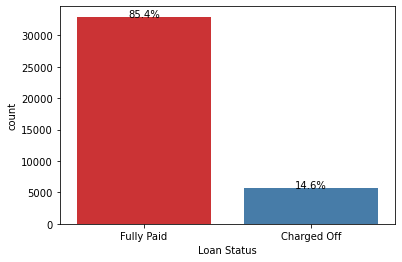

In [104]:
#Univariate analysis on loan status

univariate_categorical("loan_status","Loan Status")

#Observation: 
#1. people who fully paid their loan - 85%
#2. people who defaulted  - 15%

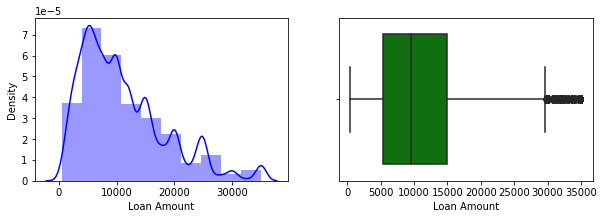

In [105]:
#Analysis on loan_amount

univariate_quantative("loan_amnt","Loan Amount")

#Observation:
#1. most of the people took loan amount between 5000 - 15000 USD.
#2. the median of the distribution is around 10000 USD.
#3. there are few outliers between 30000 - 35000 USD.

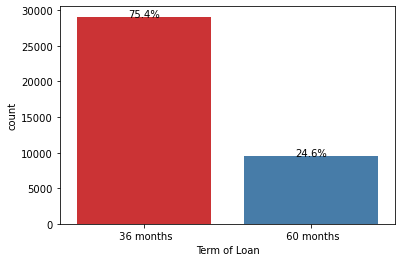

In [106]:
#Univariate analysis on term of loan

univariate_categorical("term",'Term of Loan')

#Observation:
#1. people who took loan for 36 months - 75%
#2. people who took loan for 60 months - 25%

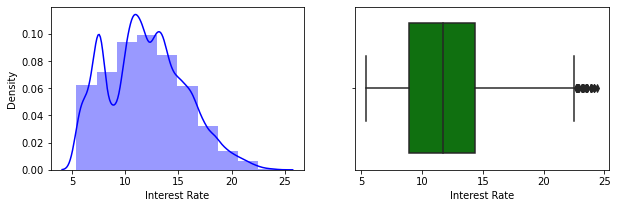

In [107]:
#Analysis on interest rate

univariate_quantative("int_rate","Interest Rate")

#Observation:
#1. most of the people who took loan have interest rate  arount 9% - 14%
#2. the median of the distribution is around 12%

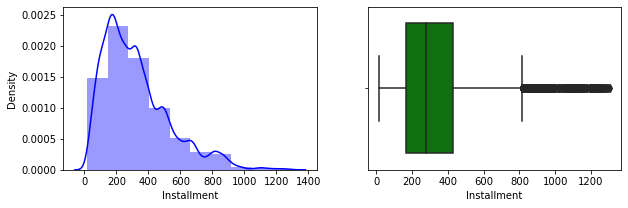

In [108]:
#Analysis on installment amount

univariate_quantative("installment","Installment")

#Observation:
#1. most of the people who took loan have installment amount  arount 165 - 425 USD.
#2. the median of the distribution is around 278 USD.
#3. there are few outliers between 800 - 1300 USD.

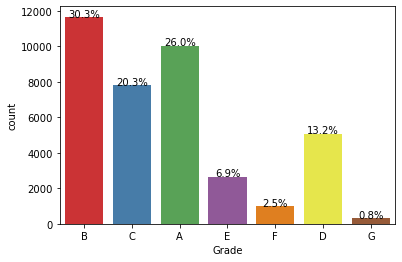

In [109]:
#Univariate analysis on grade of loan

univariate_categorical("grade","Grade")

#Observation:
#1. maximun number of loans were given to "B" grade group of people.
#2. minimum number of loans were given to "G" grade group of people.

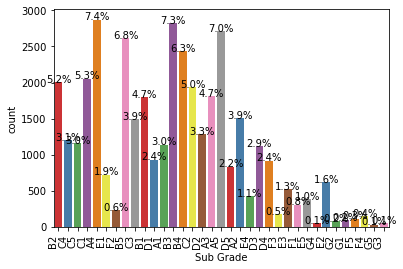

In [113]:
#Univariate analysis on sub grade of loan

univariate_categorical("sub_grade","Sub Grade")

#Observation:
#1. maximun number of loans were given to "A4" grade group of people.
#2. second highest number of loans were given to "B3" grade group of people.

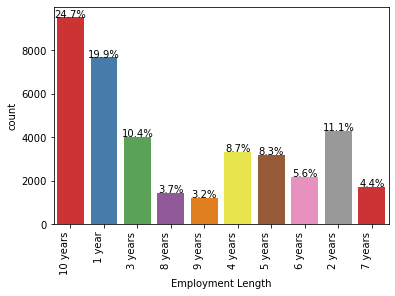

In [114]:
#Univariate analysis on employee length of loan

univariate_categorical("emp_length","Employment Length")

#Observation:
#1. maximum number of loan is given to people with 10 and more years of employment length. 
#2. second highest number of loan is given to people with 1 or less than 1 year of employment length.

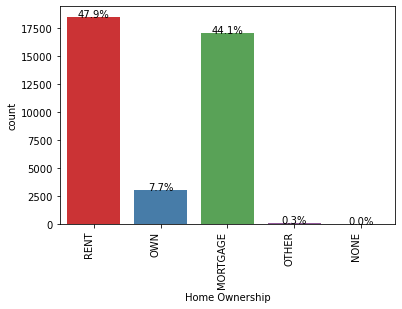

In [115]:
#Univariate analysis on home ownership of loan
univariate_categorical("home_ownership","Home Ownership")
#Observation:
#1. maximum number of loan is given to people with rented home.


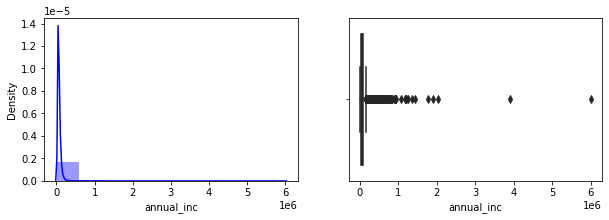

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [116]:
#Analysis on annual income
plt.figure(figsize=(10,3))
plt.subplot(1, 2, 1)
sns.distplot(df.annual_inc,bins=10,color='b')
plt.subplot(1, 2, 2)
sns.boxplot(df.annual_inc, color='g')
plt.show()

df.annual_inc.describe()

#Observation:
#1. we find that the maximum number of annual_income lies between 4000 - 80000 USD.
#2. there are outliers


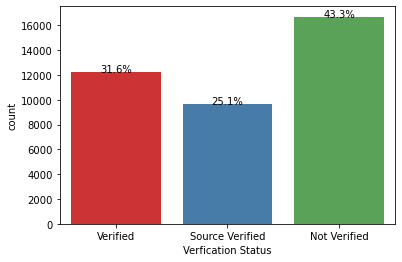

In [124]:
#Univariate analysis on verification status of loan

univariate_categorical("verification_status","Verfication Status")

#Observation:
# maximum number of loan taken were not verified


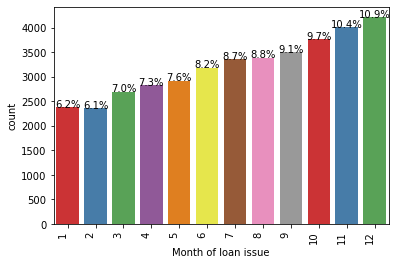

In [118]:
#Univariate analysis on month of loan

univariate_categorical("issue_d_month","Month of loan issue")

#Observation:
#1. maximun number of loans were taken in month of December , as it is festival season.
#2. minimum number of loans were taken in month of January and February, fair because most people have recently taken loan in December.

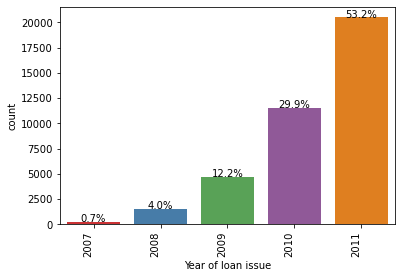

In [119]:
#Univariate analysis on year of loan

univariate_categorical("issue_d_year","Year of loan issue")

#Observation:
#1. The number of loan has been increasing significantly from 2007 to 2011.

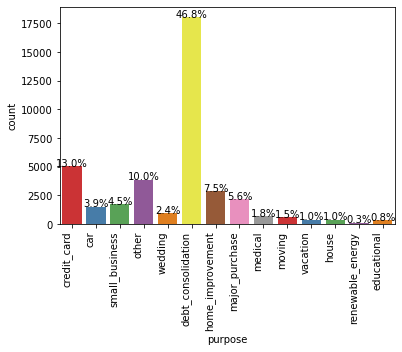

In [120]:
#Univariate analysis on purpose of loan

univariate_categorical("purpose","purpose")

#Observation:
# maximun number of loans were taken for debt consolidation 
# second highest number of loans were taken to pay the credit card bill

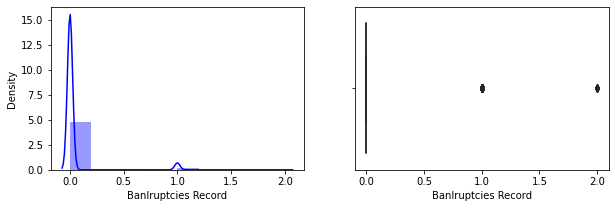

In [121]:
#Analysis on installment

univariate_quantative("pub_rec_bankruptcies","Banlruptcies Record")

#Observation
#1. most of the record lies at 0 bankruptcies.
#2. there are few outliers at 1 and 2 bankrupties.

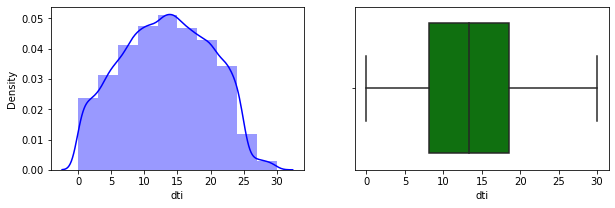

In [122]:
#Analysis on dti

univariate_quantative("dti","dti")

#Observation:
#1. most of the value for debt to income ratio lies between 9 - 15.


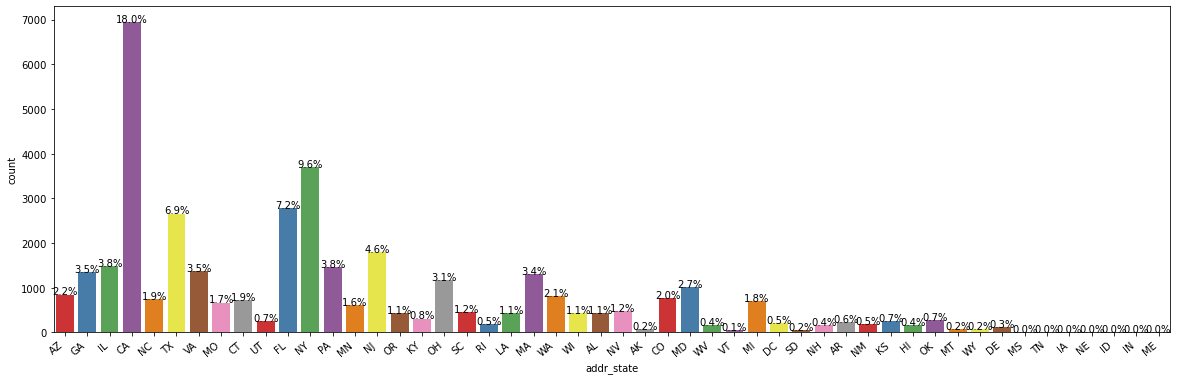

In [112]:
#Univariate analysis on adderess state
plt.figure(figsize=(20,6))
ax=sns.countplot(df.addr_state,palette='Set1')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

total = float(len(df))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')

plt.show()

#Observation:
#1. maximum number of loans were taken by people of California, followed by New York.


### 2. Segmented Univariate Analysis

In [113]:
#function for segmented univariate analysis
def segmented_univariate(x,z):
    plt.figure(figsize=(16,4))
    plt.subplot(1,2,1)
    ax = sns.countplot(x=x,data=df,hue='loan_status')
    ax.set_title(z+" "+'Distribution',fontsize=14,color='black')
    ax.set_xlabel(z,fontsize=14,color = 'black')
    ax.set_ylabel('Count',fontsize=14,color = 'black')      
    ax.legend(bbox_to_anchor=(1, 1))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
    for i in ax.patches:
        ax.text (i.get_x() + i.get_width()  / 2,i.get_height()+ 2,i.get_height(),horizontalalignment='center', color='black',fontsize = 8)

    plt.subplot(1,2,2)
    ax = sns.barplot(x=x, y='default', data=df, estimator=np.mean)
    ax.set_title(z+" "+'vs Default')
    ax.set_ylabel('Defaut rate')
    ax.set_xlabel(z)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
                   
    plt.show()

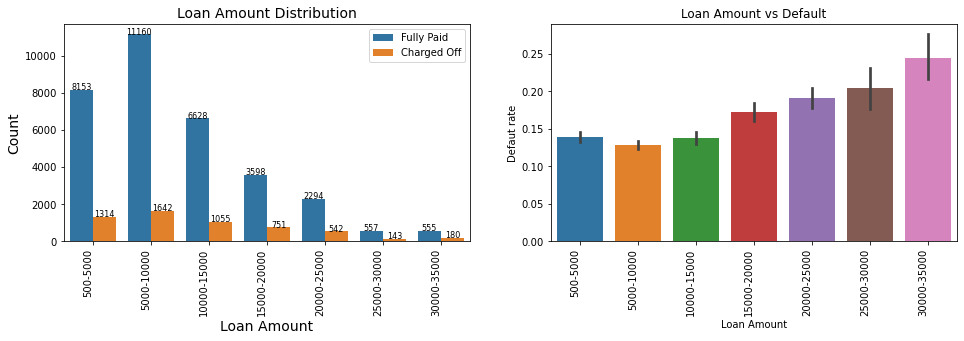

In [114]:
#segmenting the "loan amount" on basis of "loan status"

segmented_univariate("loan_amnt_category","Loan Amount")

#Observation:
#the default rate is higher for a higher loan amount

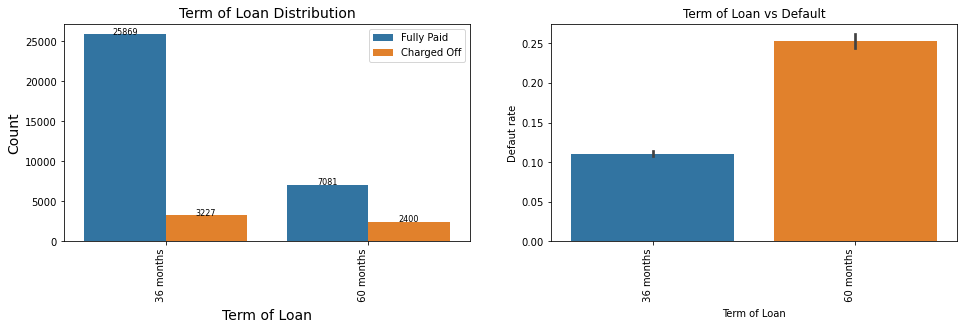

In [115]:
#segmentation of Term of loan on the basis of loan status

segmented_univariate("term","Term of Loan")

#Observation:
#people are more likely to default with the loan term of 60 months.

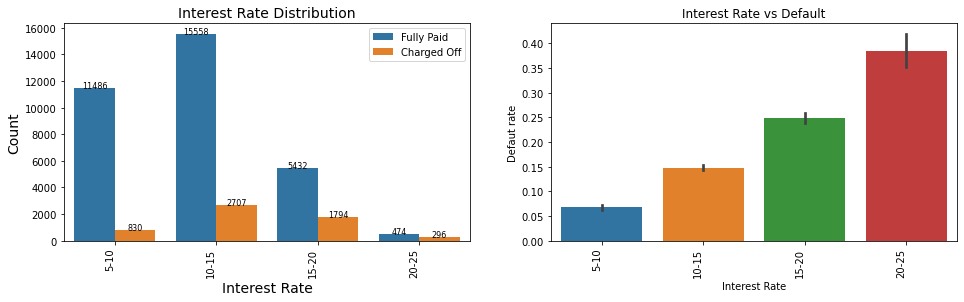

In [116]:
#segmentation of Interest rate on the basis of loan status

segmented_univariate("int_rate_category","Interest Rate")

#Observation:
#we observe that as the interest rate increases the percentage of person defaulting in each bucket of interest rate 
#is also increasing

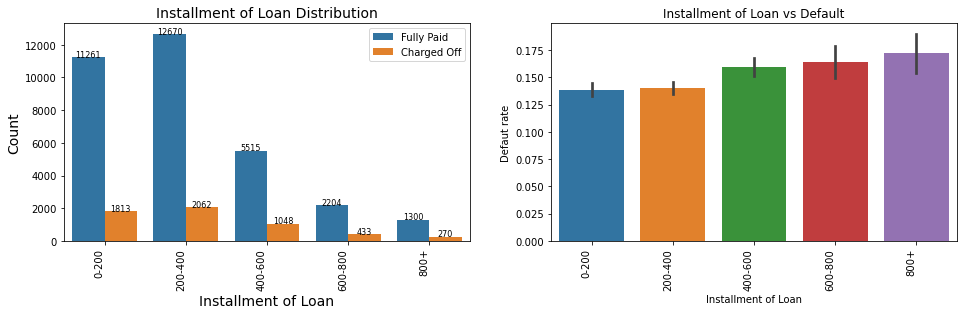

In [117]:
#segmentation of Installment Amount on the basis of loan status

segmented_univariate("installment_category","Installment of Loan")

#Observation:
#as the Installment Amount increases the percentage of people defaulting is increasing.

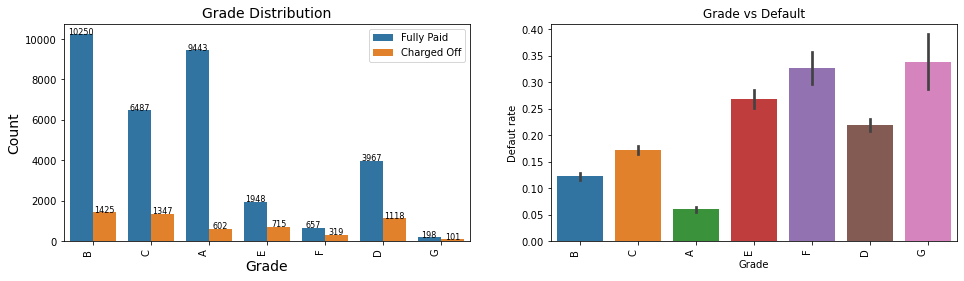

In [118]:
#segmentation of Grade on the basis of loan status

segmented_univariate("grade","Grade")

#Observation:
# percentage of people defaulting follows this pattern : A<B<C<D<E<F<G
#A grade are less likely to default, whereas G grade is most likely to default

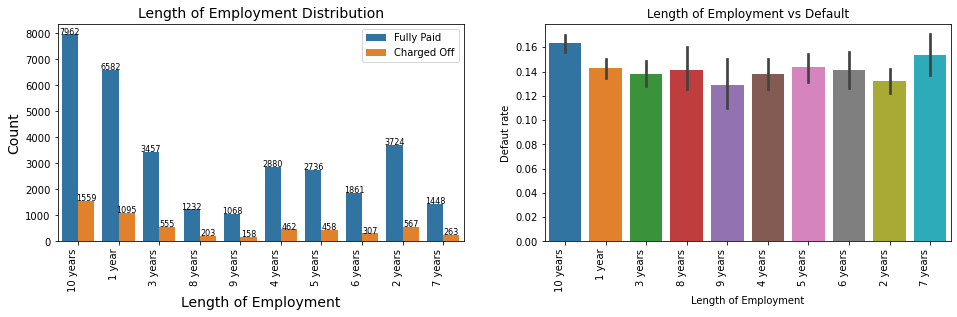

In [119]:
#segmentation of Employment Length on the basis of loan status

segmented_univariate("emp_length","Length of Employment")

#Observation:
#the percentage of default is maximum for people with 10 or more years of employment length.

posx and posy should be finite values
posx and posy should be finite values


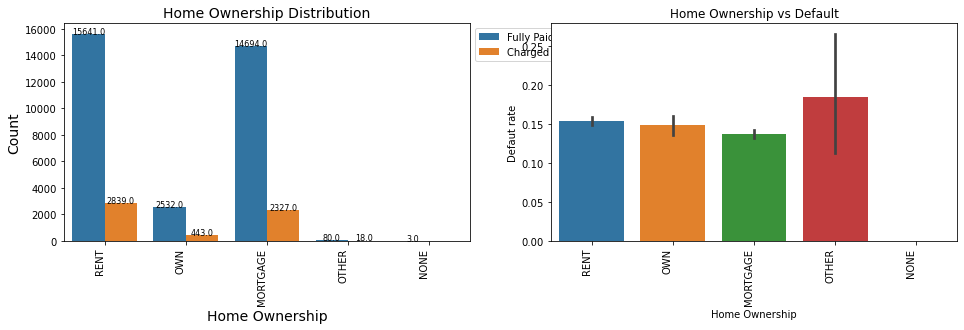

In [120]:
#segmentation of Home Ownership on the basis of loan status

segmented_univariate("home_ownership","Home Ownership")

#Observation:
#people with "Mortgage" type of home ownership are less likely to default.

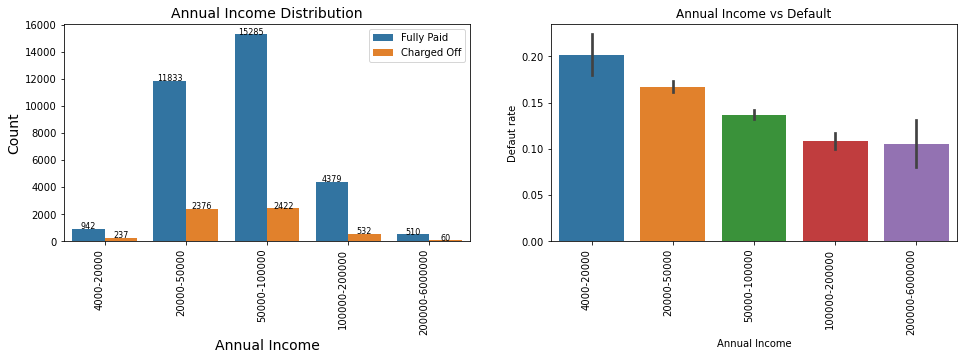

In [121]:
#segmentation of Annual Income on the basis of loan status

segmented_univariate("annual_inc_category","Annual Income")

#Observation:
#as the annual income increases the default rate decreases.

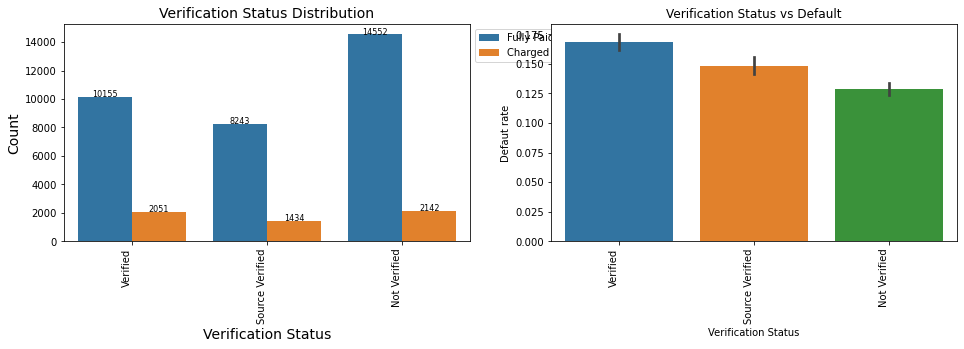

In [122]:
#segmentation of Verification Status on the basis of loan status

segmented_univariate("verification_status","Verification Status")

#Observation:
#we find that people with "verfied" status are more likely to default,
#whereas people with "not verified" status are less likely to default.

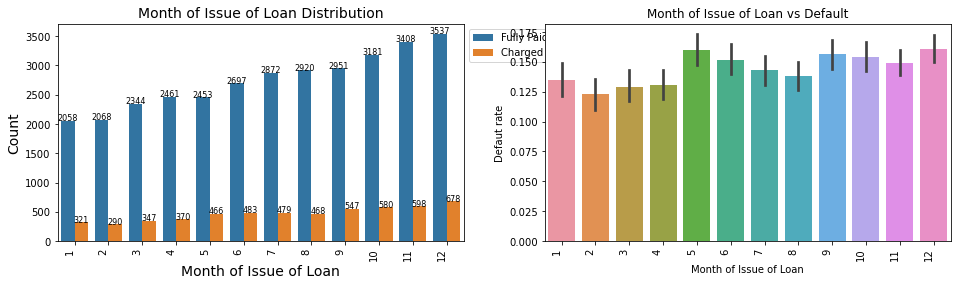

In [123]:
#segmentation of Month of Issue of Loan on the basis of loan status

segmented_univariate("issue_d_month","Month of Issue of Loan")

#Observation:
#the default rates are higher for months of December and May.
#we can assume that as December is festival season and May is financial year ending, so loans are more.

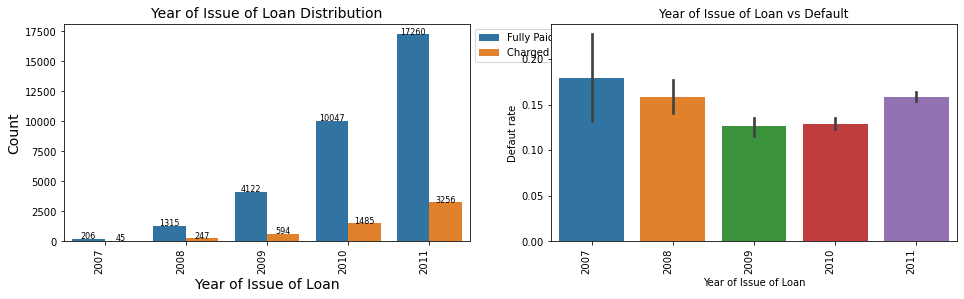

In [124]:
#segmentation of Year of Issue of Loan on the basis of loan status

segmented_univariate("issue_d_year","Year of Issue of Loan")

#Observation:
#the ration of people defaulting their loans were highest in 2007 and lowest in 2009.

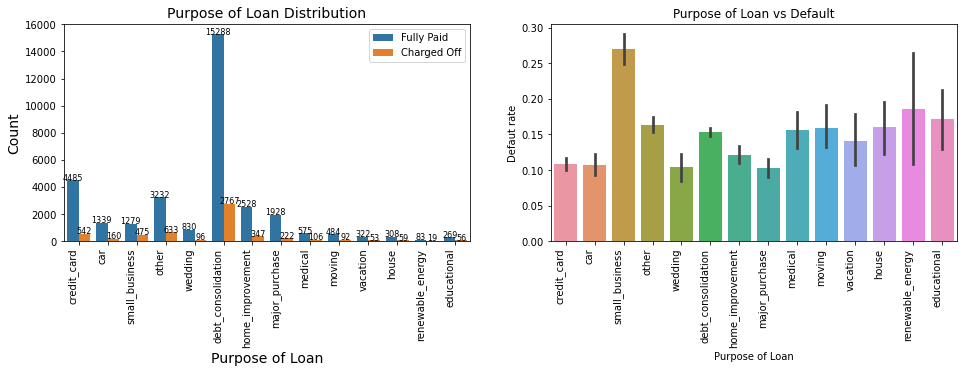

In [125]:
#segmentation of Purpose of loan on the basis of loan status

segmented_univariate("purpose","Purpose of Loan")

#Observation:
#"small business" have the highest chance of defaulting.

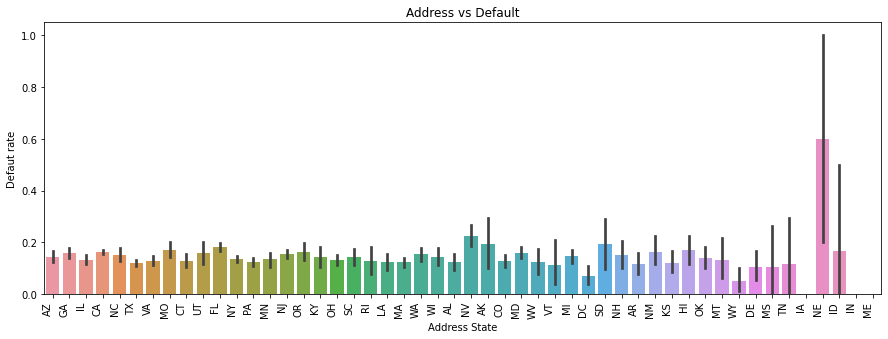

In [126]:
#segmentation of State on the basis of default status
plt.figure(figsize=(15,5))
ax = sns.barplot(x='addr_state', y='default', data=df, estimator=np.mean)
ax.set_title('Address vs Default')
ax.set_ylabel('Defaut rate')
ax.set_xlabel('Address State')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")

plt.show()

#Observation:
#from the above graph we find out that "NE" is having the maximum chances of person defaulting.

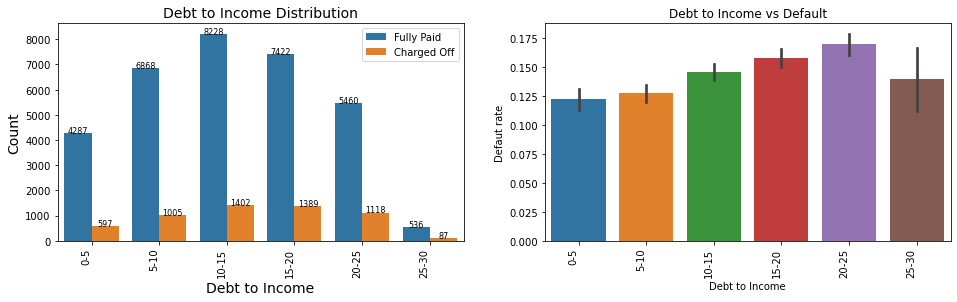

In [127]:
#segmentation of Debt to Income on the basis of loan status

segmented_univariate("dti_category","Debt to Income")

#Observation:
#the default rate gradually increases as the dti increases,then there is a downfall for dti bucket 25-30.

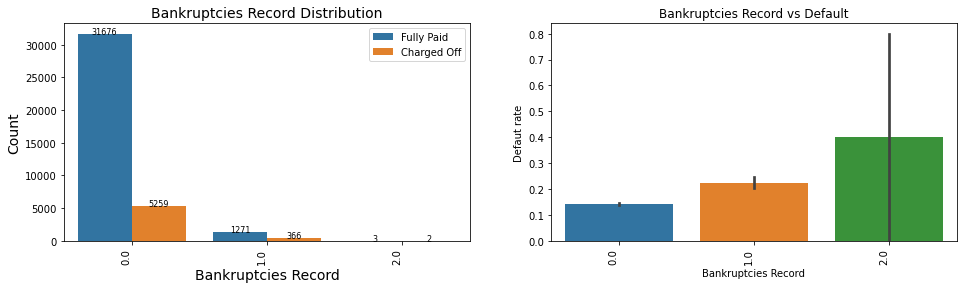

In [128]:
#segmentation of Bankruptcies on the basis of loan status

segmented_univariate("pub_rec_bankruptcies","Bankruptcies Record")

#Observation:
#we find that as the number of bankruptcies increases the default rate also increases.

### 3. Bivariate Analysis

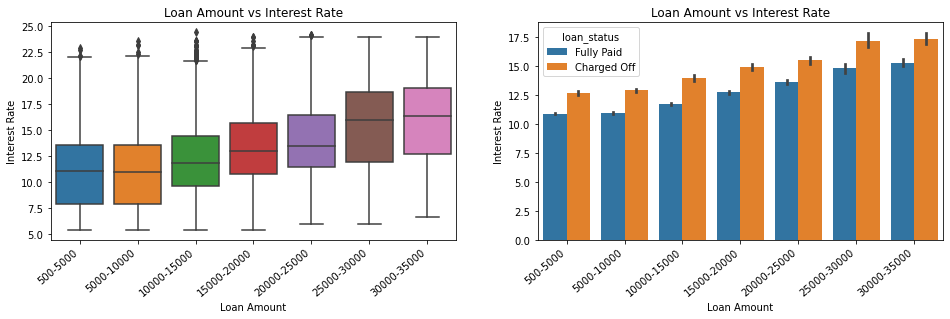

In [129]:
#Interest Rate vs Loan Amount

plt.figure(figsize=(16,4))
plt.subplot(1, 2, 1)
ax = sns.boxplot(y='int_rate', x='loan_amnt_category', data =df)
ax.set_title('Loan Amount vs Interest Rate')
ax.set_ylabel('Interest Rate')
ax.set_xlabel('Loan Amount')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

plt.subplot(1, 2, 2)
ax = sns.barplot(y='int_rate', x='loan_amnt_category', data =df, estimator=np.mean, hue='loan_status')
ax.set_title('Loan Amount vs Interest Rate')
ax.set_ylabel('Interest Rate')
ax.set_xlabel('Loan Amount')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

plt.show()

#Observation:
#1. Interest Rate increases with increase in loan amount.
#2. We find that for the same bucket of loan amount, the interest rate is higher for the people who default
#   at their loan.

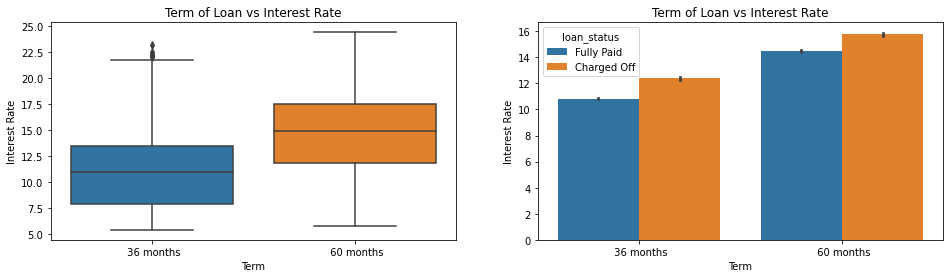

In [130]:
#Interest Rate vs Term of Loan
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
ax = sns.boxplot(y='int_rate', x='term', data =df)
ax.set_title('Term of Loan vs Interest Rate')
ax.set_ylabel('Interest Rate')
ax.set_xlabel('Term')

plt.subplot(1,2,2)
ax = sns.barplot(y='int_rate', x='term', data =df, hue="loan_status", estimator=np.mean)
ax.set_title('Term of Loan vs Interest Rate')
ax.set_ylabel('Interest Rate')
ax.set_xlabel('Term')
plt.show()

#Observation:
#1. Interest Rate increases with increase in erm of loan.
#2. We find that for the same term , the interest rate is higher for the people who default
#   at their loan.

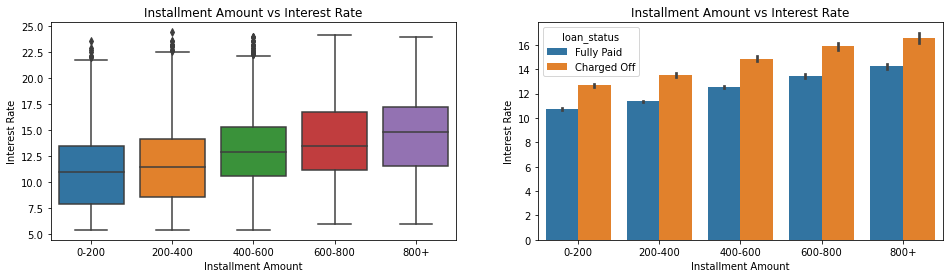

In [131]:
#Interest Rate vs Installment Amount
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
ax = sns.boxplot(y='int_rate', x='installment_category', data =df)
ax.set_title('Installment Amount vs Interest Rate')
ax.set_ylabel('Interest Rate')
ax.set_xlabel('Installment Amount')

plt.subplot(1,2,2)
ax = sns.barplot(y='int_rate', x='installment_category', data =df,hue="loan_status", estimator=np.mean)
ax.set_title('Installment Amount vs Interest Rate')
ax.set_ylabel('Interest Rate')
ax.set_xlabel('Installment Amount')
plt.show()

#Observation:
#1. Interest Rate increases with increase in installment amount.
#2. We find that for the same bucket of installment amount, the interest rate is higher for the people who default
#   at their loan.

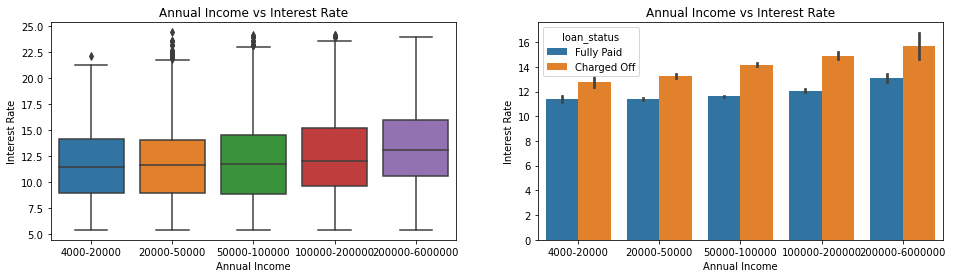

In [132]:
#Interest Rate vs Annual Income
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
ax = sns.boxplot(y='int_rate', x='annual_inc_category', data =df)
ax.set_title('Annual Income vs Interest Rate')
ax.set_ylabel('Interest Rate')
ax.set_xlabel('Annual Income')

plt.subplot(1,2,2)
ax = sns.barplot(y='int_rate', x='annual_inc_category', data =df,hue="loan_status", estimator=np.mean)
ax.set_title('Annual Income vs Interest Rate')
ax.set_ylabel('Interest Rate')
ax.set_xlabel('Annual Income')
plt.show()

#Observation:
#1. Interest Rate increases slightly with increase in annual income.
#2. We find that for the same bucket of annual income, the interest rate is higher for the people who default
#   at their loan.

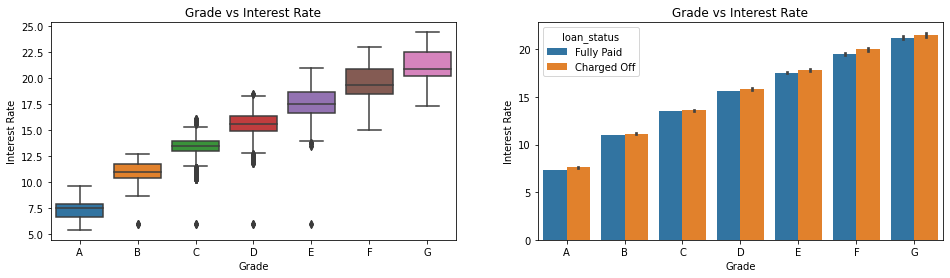

In [133]:
#Interest Rate vs Grade
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
ax = sns.boxplot(y='int_rate', x='grade', data =df, order='ABCDEFG')
ax.set_title('Grade vs Interest Rate')
ax.set_ylabel('Interest Rate')
ax.set_xlabel('Grade')

plt.subplot(1,2,2)
ax = sns.barplot(y='int_rate', x='grade', data =df, order='ABCDEFG',hue="loan_status", estimator=np.mean)
ax.set_title('Grade vs Interest Rate')
ax.set_ylabel('Interest Rate')
ax.set_xlabel('Grade')
plt.show()

#Observation:
#1. Interest Rate is lowest for "A Grade and it increase gradually till "G Grade.
#2. We find that for the same grade, the interest rate is slightly higher for the people who default
#   at their loan.

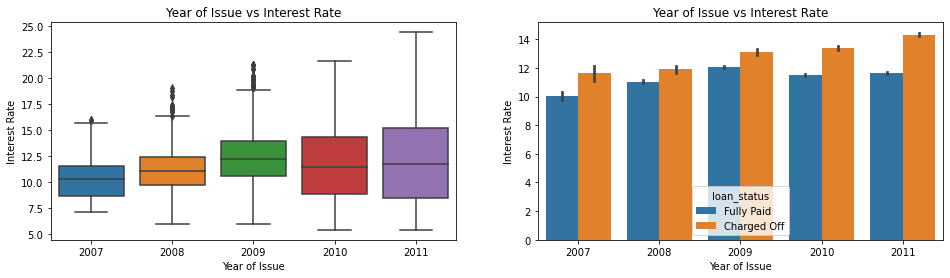

In [134]:
#Interest Rate vs Year of Issuing Loan
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
ax = sns.boxplot(y='int_rate', x='issue_d_year', data =df)
ax.set_title('Year of Issue vs Interest Rate')
ax.set_ylabel('Interest Rate')
ax.set_xlabel('Year of Issue')

plt.subplot(1,2,2)
ax = sns.barplot(y='int_rate', x='issue_d_year', data =df,hue="loan_status", estimator=np.mean)
ax.set_title('Year of Issue vs Interest Rate')
ax.set_ylabel('Interest Rate')
ax.set_xlabel('Year of Issue')
plt.show()

#Observation:
#1. We find that for the same year, the interest rate is mostly higher for the people who default
#   at their loan.

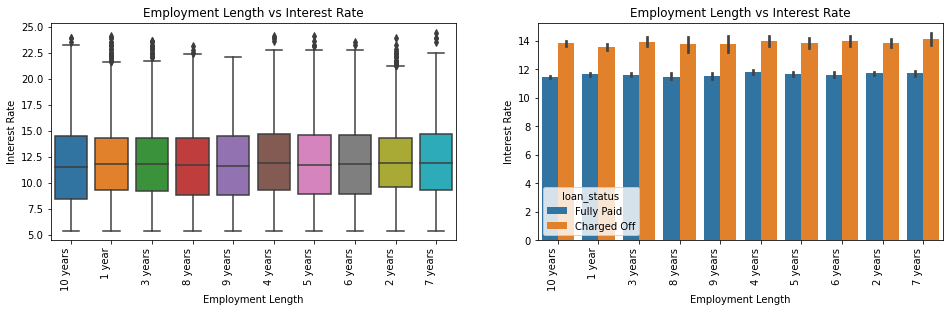

In [135]:
#Interest Rate vs Employment Length
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
ax = sns.boxplot(y='int_rate', x='emp_length', data =df)
ax.set_title('Employment Length vs Interest Rate')
ax.set_ylabel('Interest Rate')
ax.set_xlabel('Employment Length')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")

plt.subplot(1,2,2)
ax = sns.barplot(y='int_rate', x='emp_length', data =df,hue="loan_status", estimator=np.mean)
ax.set_title('Employment Length vs Interest Rate')
ax.set_ylabel('Interest Rate')
ax.set_xlabel('Employment Length')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")

plt.show()

#Observation:
# We find that for the same employment length, the interest rate is mostly higher for the people who default
# at their loan.

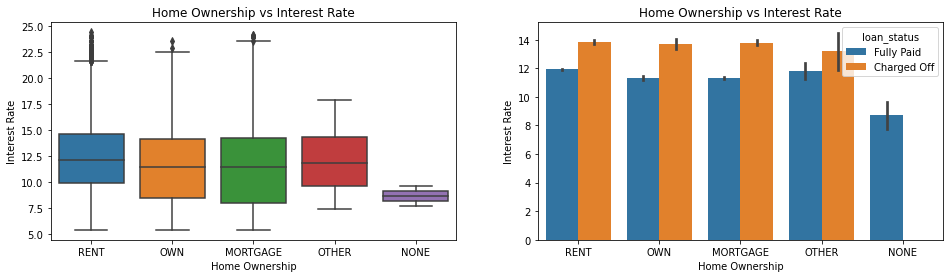

In [136]:
#Interest Rate vs Home Ownership
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
ax = sns.boxplot(y='int_rate', x='home_ownership', data =df)
ax.set_title('Home Ownership vs Interest Rate')
ax.set_ylabel('Interest Rate')
ax.set_xlabel('Home Ownership')

plt.subplot(1,2,2)
ax = sns.barplot(y='int_rate', x='home_ownership', data =df, hue="loan_status", estimator=np.mean)
ax.set_title('Home Ownership vs Interest Rate')
ax.set_ylabel('Interest Rate')
ax.set_xlabel('Home Ownership')
plt.show()

#Observation:
#1. Interest Rate is higher for people with "Rented" home.
#2. We find that for the same type of home ownership, the interest rate is higher for the people who default
#   at their loan.


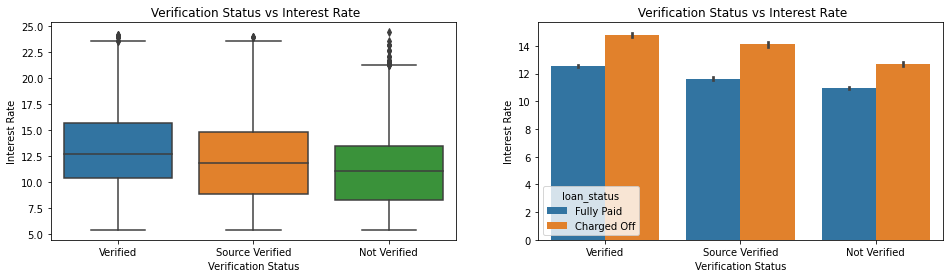

In [137]:
#Interest Rate vs Verification Status
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
ax = sns.boxplot(y='int_rate', x='verification_status', data =df)
ax.set_title(' Verification Status vs Interest Rate')
ax.set_ylabel('Interest Rate')
ax.set_xlabel('Verification Status')

plt.subplot(1,2,2)
ax = sns.barplot(y='int_rate', x='verification_status', data =df, hue="loan_status", estimator=np.mean)
ax.set_title(' Verification Status vs Interest Rate')
ax.set_ylabel('Interest Rate')
ax.set_xlabel('Verification Status')

plt.show()

#Observation:
#1. Interest Rate is highest for loans having verification status as "Verified" and lowest for "Not Verified".
#2. We find that for the same verification status, the interest rate is higher for the people who default
#   at their loan.

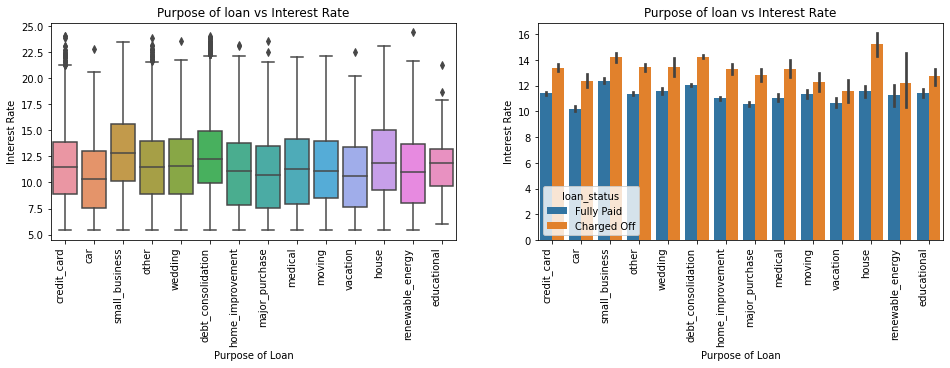

In [138]:
#Interest Rate vs Purpose of Loan
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
ax = sns.boxplot(y='int_rate', x='purpose', data =df)
ax.set_title('Purpose of loan vs Interest Rate')
ax.set_ylabel('Interest Rate')
ax.set_xlabel('Purpose of Loan')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")

plt.subplot(1,2,2)
ax = sns.barplot(y='int_rate', x='purpose', data =df, hue="loan_status", estimator=np.mean)
ax.set_title('Purpose of loan vs Interest Rate')
ax.set_ylabel('Interest Rate')
ax.set_xlabel('Purpose of Loan')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.show()

#Observation:
#1. Interest Rate is highest for the purpose of "small business" follwed by "debt consolidation".
#2. We find that for the same purpose, the interest rate is higher for the people who default
#   at their loan.

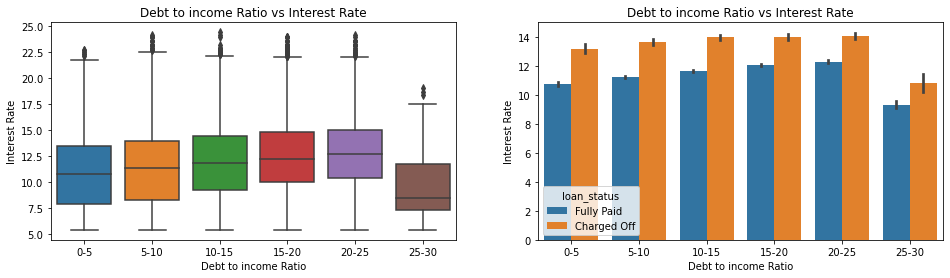

In [139]:
#Interest Rate vs Debt o Income
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
ax = sns.boxplot(y='int_rate', x='dti_category', data =df)
ax.set_title('Debt to income Ratio vs Interest Rate')
ax.set_ylabel('Interest Rate')
ax.set_xlabel('Debt to income Ratio')

plt.subplot(1,2,2)
ax = sns.barplot(y='int_rate', x='dti_category', data =df, hue="loan_status", estimator=np.mean)
ax.set_title('Debt to income Ratio vs Interest Rate')
ax.set_ylabel('Interest Rate')
ax.set_xlabel('Debt to income Ratio')

plt.show()

#Observation:
#1. Interest Rate increases with increase in dti and dips again at 25-30.
#2. We find that for the same bucket of dti, the interest rate is higher for the people who default
#   at their loan.


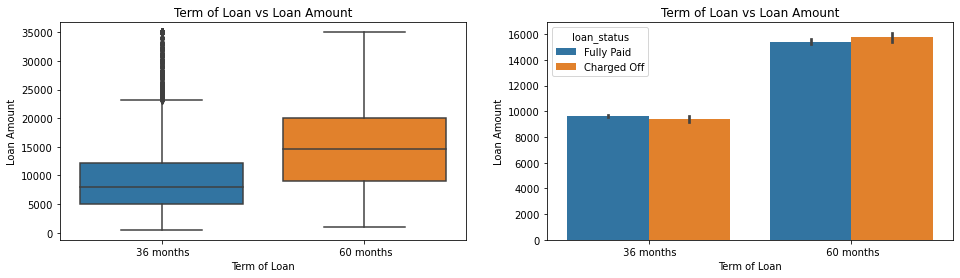

In [140]:
#Loan Amount vs Term of Loan
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
ax = sns.boxplot(y='loan_amnt', x='term', data =df)
ax.set_title('Term of Loan vs Loan Amount')
ax.set_ylabel('Loan Amount')
ax.set_xlabel('Term of Loan')

plt.subplot(1,2,2)
ax = sns.barplot(y='loan_amnt', x='term', data =df, hue="loan_status", estimator=np.mean)
ax.set_title('Term of Loan vs Loan Amount')
ax.set_ylabel('Loan Amount')
ax.set_xlabel('Term of Loan')

plt.show()

#Observation:
#1. Loan amount increases with increase in term of loan.

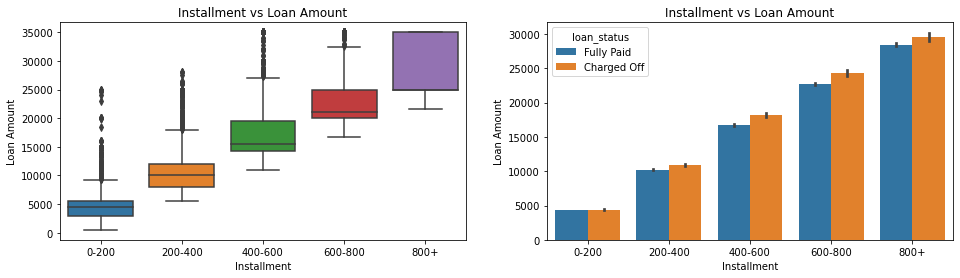

In [141]:
#Loan Amount vs Installment Amount
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
ax = sns.boxplot(y='loan_amnt', x='installment_category', data =df)
ax.set_title('Installment vs Loan Amount')
ax.set_ylabel('Loan Amount')
ax.set_xlabel('Installment')

plt.subplot(1,2,2)
ax = sns.barplot(y='loan_amnt', x='installment_category', data =df, hue="loan_status", estimator=np.mean)
ax.set_title('Installment vs Loan Amount')
ax.set_ylabel('Loan Amount')
ax.set_xlabel('Installment')

plt.show()

#Observation:
#1. Loan amount increases with increase in installment amount.
#2. We find that for the same bucket of installment amount, the loan amount is slightly higher for the people who default
#   at their loan.

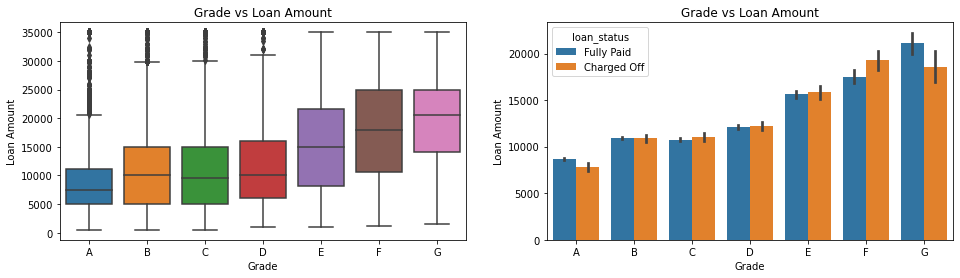

In [142]:
#Loan Amount vs Grade
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
ax = sns.boxplot(y='loan_amnt', x='grade', data =df,order='ABCDEFG')
ax.set_title('Grade vs Loan Amount')
ax.set_ylabel('Loan Amount')
ax.set_xlabel('Grade')

plt.subplot(1,2,2)
ax = sns.barplot(y='loan_amnt', x='grade', data =df, hue="loan_status", estimator=np.mean, order='ABCDEFG')
ax.set_title('Grade vs Loan Amount')
ax.set_ylabel('Loan Amount')
ax.set_xlabel('Grade')

plt.show()

#Observation:
#1. Loan amount is minimum for people in "A Grade" and in increases gradually till "G Grade".

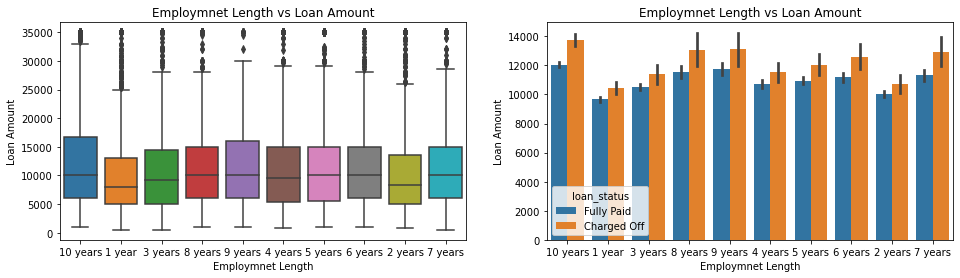

In [143]:
#Loan Amount vs Employment Length
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
ax = sns.boxplot(y='loan_amnt', x='emp_length', data =df)
ax.set_title('Employmnet Length vs Loan Amount')
ax.set_ylabel('Loan Amount')
ax.set_xlabel('Employmnet Length')

plt.subplot(1,2,2)
ax = sns.barplot(y='loan_amnt', x='emp_length', data =df, hue="loan_status", estimator=np.mean)
ax.set_title('Employmnet Length vs Loan Amount')
ax.set_ylabel('Loan Amount')
ax.set_xlabel('Employmnet Length')

plt.show()

#Observation:
#1. Loan amount is maximun for people with employment lengt of 10 or more years and lowest for 1 year or less.
#2. We find that for the same employment length, the loan amount is higher for the people who default at their loan.

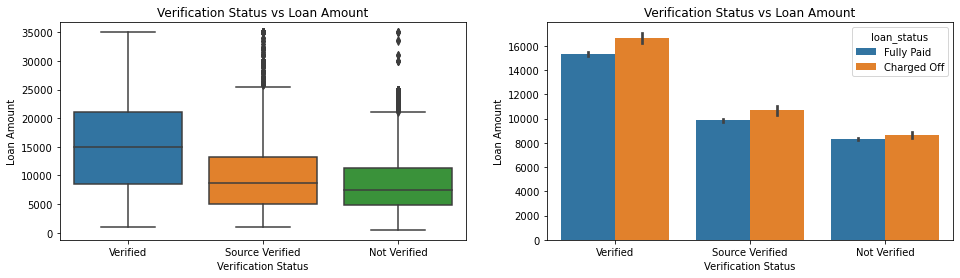

In [144]:
#Loan Amount vs Verification Status
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
ax = sns.boxplot(y='loan_amnt', x='verification_status', data =df)
ax.set_title('Verification Status vs Loan Amount')
ax.set_ylabel('Loan Amount')
ax.set_xlabel('Verification Status')

plt.subplot(1,2,2)
ax = sns.barplot(y='loan_amnt', x='verification_status', data =df, hue="loan_status", estimator=np.mean)
ax.set_title('Verification Status vs Loan Amount')
ax.set_ylabel('Loan Amount')
ax.set_xlabel('Verification Status')

plt.show()

#Observation:
#1. Loan amount is maximun for people with their verification status as "Verified" and minimum for "Not Verified".
#2. We find that for the same verification status, the loan amount is higher for the people who default at their loan.

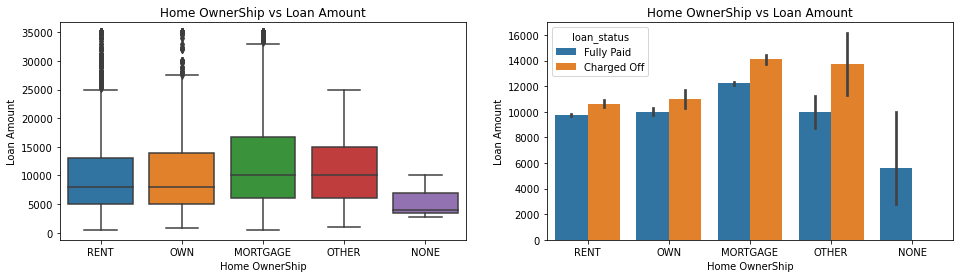

In [145]:
#Loan Amount vs Home Ownership
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
ax = sns.boxplot(y='loan_amnt', x='home_ownership', data =df)
ax.set_title('Home OwnerShip vs Loan Amount')
ax.set_ylabel('Loan Amount')
ax.set_xlabel('Home OwnerShip')

plt.subplot(1,2,2)
ax = sns.barplot(y='loan_amnt', x='home_ownership', data =df, hue="loan_status", estimator=np.mean)
ax.set_title('Home OwnerShip vs Loan Amount')
ax.set_ylabel('Loan Amount')
ax.set_xlabel('Home OwnerShip')

plt.show()

#Observation:
#1. Loan amount is highest for people who have "Mortgaged" home.
#2. We find that for the same type of home ownership, the loan amount is higher for the people who default at their loan.

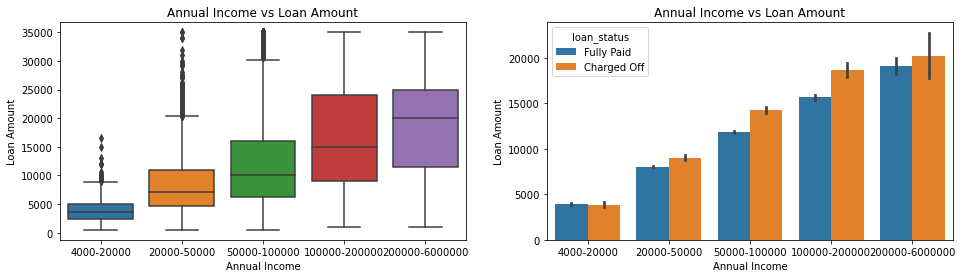

In [146]:
#Loan Amount vs Annual Income
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
ax = sns.boxplot(y='loan_amnt', x='annual_inc_category', data =df)
ax.set_title('Annual Income vs Loan Amount')
ax.set_ylabel('Loan Amount')
ax.set_xlabel('Annual Income')

plt.subplot(1,2,2)
ax = sns.barplot(y='loan_amnt', x='annual_inc_category', data =df, hue="loan_status", estimator=np.mean)
ax.set_title('Annual Income vs Loan Amount')
ax.set_ylabel('Loan Amount')
ax.set_xlabel('Annual Income')

plt.show()

#Observation:
#1. Loan amount increases with increase in annual income.
#2. We find that for the same bucket of annual income, the loan amount is mostly higher for the people who default
#   at their loan.

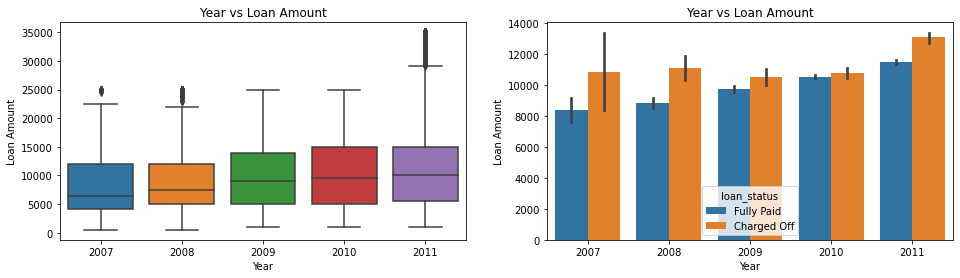

In [147]:
#Loan Amount vs Year of Issue of Loan
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
ax = sns.boxplot(y='loan_amnt', x='issue_d_year', data =df)
ax.set_title('Year vs Loan Amount')
ax.set_ylabel('Loan Amount')
ax.set_xlabel('Year')

plt.subplot(1,2,2)
ax = sns.barplot(y='loan_amnt', x='issue_d_year', data =df, hue="loan_status", estimator=np.mean)
ax.set_title('Year vs Loan Amount')
ax.set_ylabel('Loan Amount')
ax.set_xlabel('Year')

plt.show()

#Observation:
#1. Loan amount is increasing gradually every year.
#2. We find that for the same year, the loan amount is mostly higher for the people who default
#   at their loan.

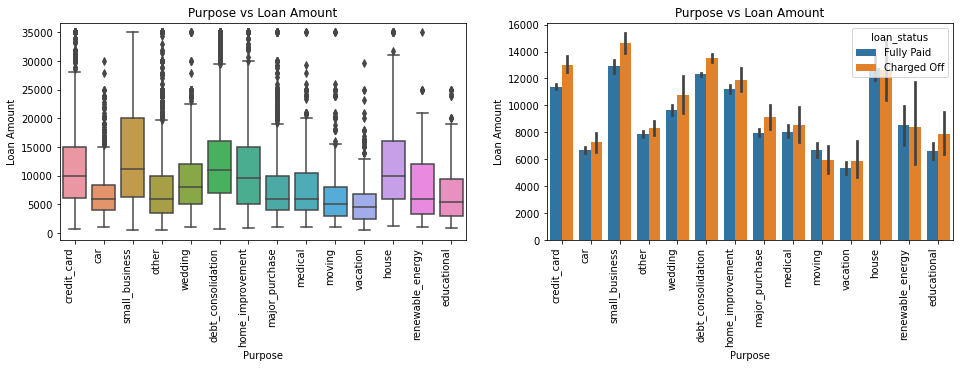

In [148]:
#Loan Amount vs Purpose of Loan
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
ax = sns.boxplot(y='loan_amnt', x='purpose', data =df)
ax.set_title('Purpose vs Loan Amount')
ax.set_ylabel('Loan Amount')
ax.set_xlabel('Purpose')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")

plt.subplot(1,2,2)
ax = sns.barplot(y='loan_amnt', x='purpose', data =df, hue="loan_status", estimator=np.mean)
ax.set_title('Purpose vs Loan Amount')
ax.set_ylabel('Loan Amount')
ax.set_xlabel('Purpose')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")

plt.show()

#Observation:
#1. Loan amount is maximum for small_business purpose follwed by debt consolidation.
#2. We find that for the same purpose, the loan amount is higher for the people who default at their loan.

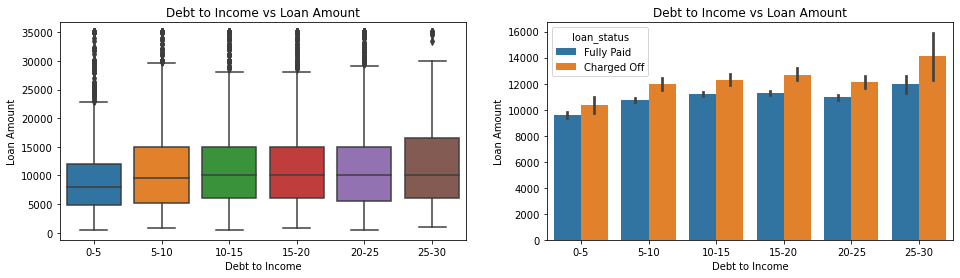

In [149]:
#Loan Amount vs Debt to Income
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
ax = sns.boxplot(y='loan_amnt', x='dti_category', data =df)
ax.set_title('Debt to Income vs Loan Amount')
ax.set_ylabel('Loan Amount')
ax.set_xlabel('Debt to Income')

plt.subplot(1,2,2)
ax = sns.barplot(y='loan_amnt', x='dti_category', data =df, hue="loan_status", estimator=np.mean)
ax.set_title('Debt to Income vs Loan Amount')
ax.set_ylabel('Loan Amount')
ax.set_xlabel('Debt to Income')

plt.show()

#Observation:
#1. Loan amount increases slightly with increase in dti.
#2. We find that for the same bucket of dti, the loan amount is higher for the people who default at their loan.

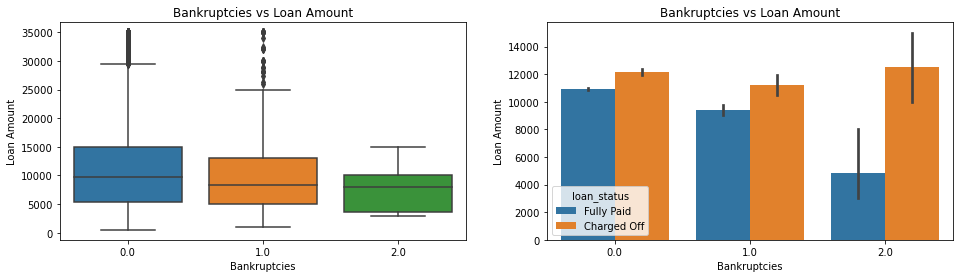

In [150]:
#Loan Amount vs Bankruptcies record
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
ax = sns.boxplot(y='loan_amnt', x='pub_rec_bankruptcies', data =df)
ax.set_title('Bankruptcies vs Loan Amount')
ax.set_ylabel('Loan Amount')
ax.set_xlabel('Bankruptcies')

plt.subplot(1,2,2)
ax = sns.barplot(y='loan_amnt', x='pub_rec_bankruptcies', data =df, hue="loan_status", estimator=np.mean)
ax.set_title('Bankruptcies vs Loan Amount')
ax.set_ylabel('Loan Amount')
ax.set_xlabel('Bankruptcies')

plt.show()

#Observation:
#1. Loan amount decreases with increase in number of Bankruptcies.
#2. We find that for the same number of bankruptcies, the loan amount is higher for the people who default at their loan.

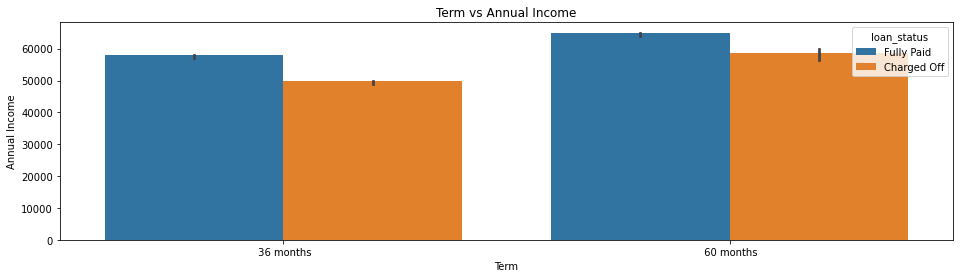

In [151]:
#Annual Income vs Term of Loan
plt.figure(figsize=(16,4))

ax = sns.barplot(y='annual_inc', x='term', data =df, hue="loan_status", estimator=np.median)
ax.set_title('Term vs Annual Income')
ax.set_ylabel('Annual Income')
ax.set_xlabel('Term')


plt.show()

#Observation:
#1. Annual income of people who took 60 months term is higher.
#2. We find that for the same term of loan, the annual income is lower for the people who default at their loan.

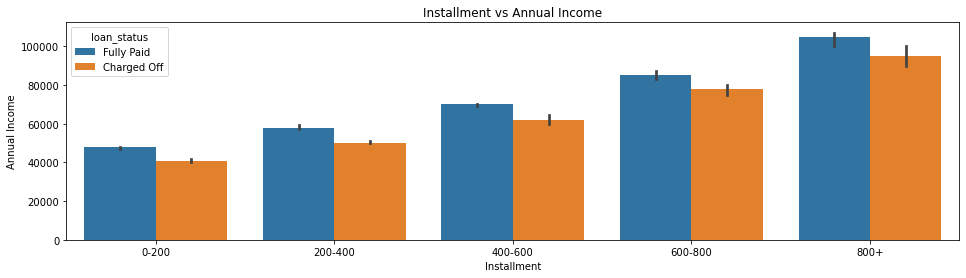

In [152]:
#Annual Income vs Installment Amount
plt.figure(figsize=(16,4))

ax = sns.barplot(y='annual_inc', x='installment_category', data =df, hue="loan_status", estimator=np.median)
ax.set_title('Installment vs Annual Income')
ax.set_ylabel('Annual Income')
ax.set_xlabel('Installment')

plt.show()

#Observation:
#1. Installment amount increases with increase in annual income.
#2. We find that for the same bucket of installment amount, the annual income is lower for the people 
#   who default at their loan.

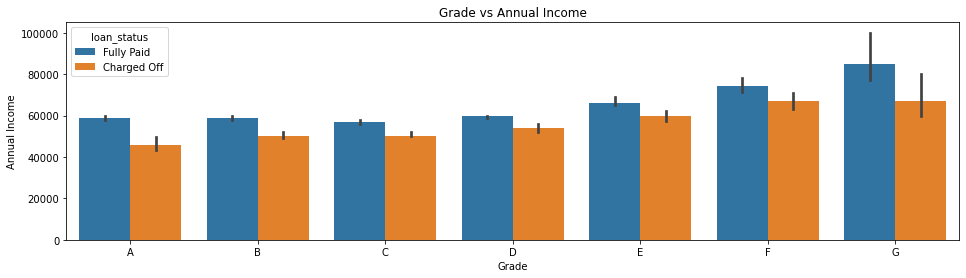

In [153]:
#Annual Income vs Grade
plt.figure(figsize=(16,4))

ax = sns.barplot(y='annual_inc', x='grade', data =df, hue="loan_status", estimator=np.median, order='ABCDEFG')
ax.set_title('Grade vs Annual Income')
ax.set_ylabel('Annual Income')
ax.set_xlabel('Grade')


plt.show()

#Observation:
# We find that for the same grade, the annual income is lower for the people who default at their loan.

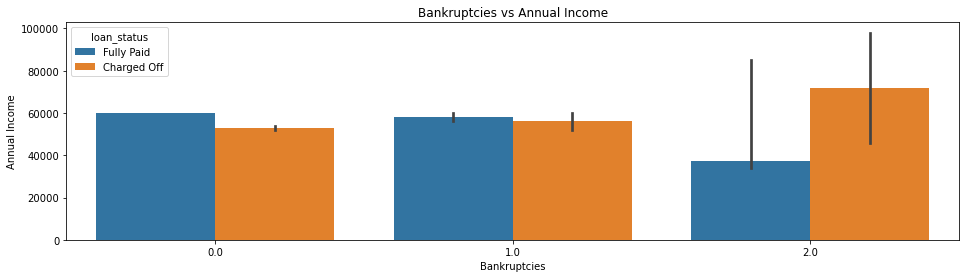

In [154]:
#Annual Income vs Bankruptcies Record

plt.figure(figsize=(16,4))

ax = sns.barplot(y='annual_inc', x='pub_rec_bankruptcies', data =df, hue="loan_status", estimator=np.median)
ax.set_title('Bankruptcies vs Annual Income')
ax.set_ylabel('Annual Income')
ax.set_xlabel('Bankruptcies')

plt.show()

#Observation:
#we do not get much information.

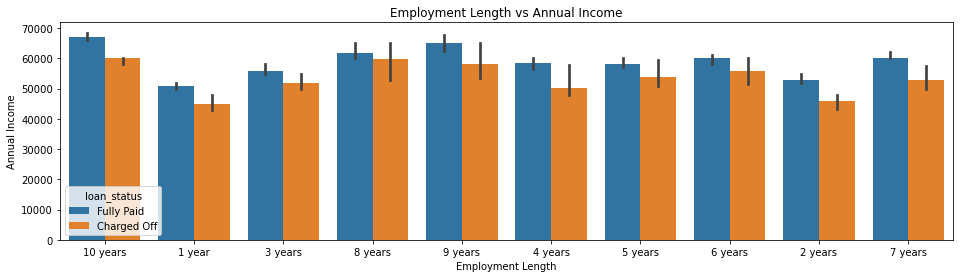

In [155]:
#Annual Income vs Employment Length
plt.figure(figsize=(16,4))

ax = sns.barplot(y='annual_inc', x='emp_length', data =df, hue="loan_status", estimator=np.median)
ax.set_title('Employment Length vs Annual Income')
ax.set_ylabel('Annual Income')
ax.set_xlabel('Employment Length')


plt.show()

#Observation:
#1. Annual income is maximum for people with experience of 10 years and above and minimum for people with 1 or
#   less years of experience .
#2. We find that for the same bucket of employment length, the annual income is lower for the people 
#   who default at their loan.

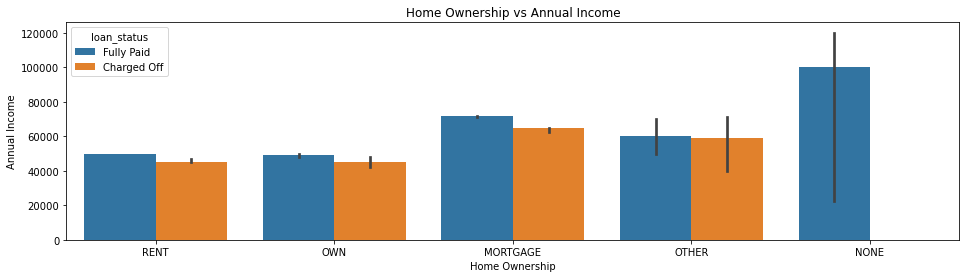

In [156]:
#Annual Income vs Home Ownership
plt.figure(figsize=(16,4))

ax = sns.barplot(y='annual_inc', x='home_ownership', data =df, hue="loan_status", estimator=np.median)
ax.set_title('Home Ownership vs Annual Income')
ax.set_ylabel('Annual Income')
ax.set_xlabel('Home Ownership')

plt.show()

#Observation:
#1. People with "Mortgaged" home have higher annual income.
#2. We find that for the same bucket of home ownership, the annual income is lower for the people 
#   who default at their loan.

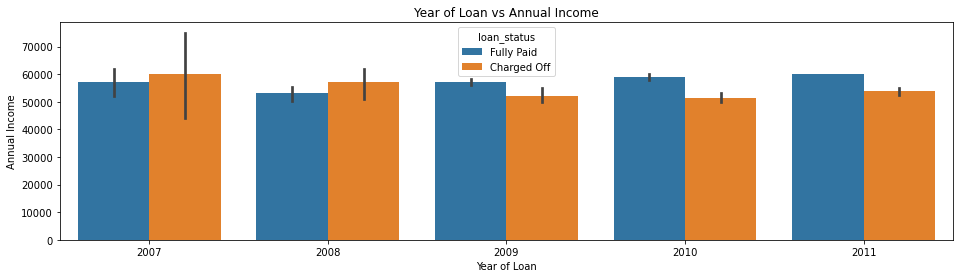

In [157]:
#Annual Income vs Year of Loan Issue
plt.figure(figsize=(16,4))

ax = sns.barplot(y='annual_inc', x='issue_d_year', data =df, hue="loan_status", estimator=np.median)
ax.set_title('Year of Loan vs Annual Income')
ax.set_ylabel('Annual Income')
ax.set_xlabel('Year of Loan')

plt.show()

#Observation:
#we do not get much information from it.

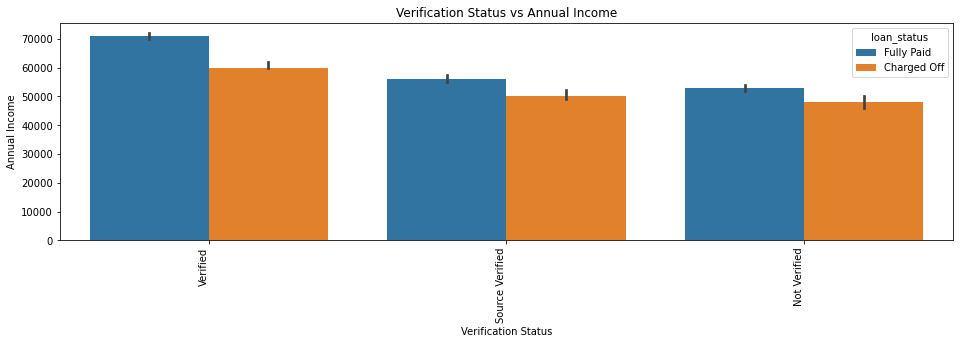

In [158]:
#Annual Income vs Verification Status
plt.figure(figsize=(16,4))

ax = sns.barplot(y='annual_inc', x='verification_status', data =df, hue="loan_status", estimator=np.median)
ax.set_title('Verification Status vs Annual Income')
ax.set_ylabel('Annual Income')
ax.set_xlabel('Verification Status')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")


plt.show()

#Observation:
#1. Annual income is highest for people with status as "Verified" and lowest for status as "Not Verified".
#2. We find that for the same bucket of verification status, the annual income is lower for the people 
#   who default at their loan.

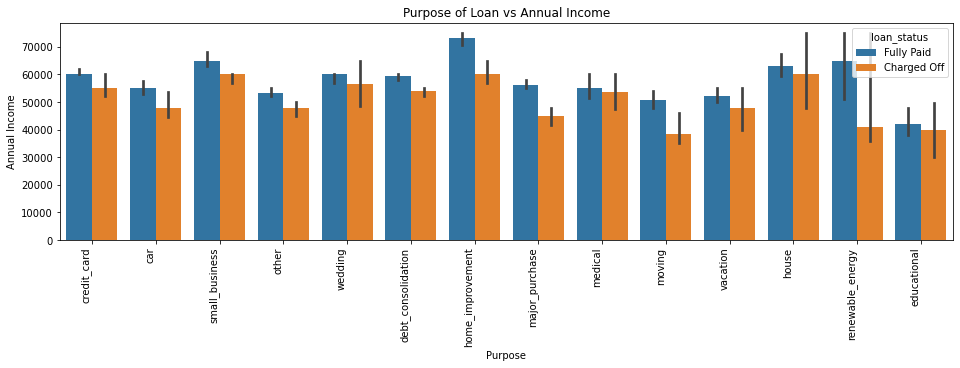

In [159]:
#Annual Income vs Purpose of Loan
plt.figure(figsize=(16,4))

ax = sns.barplot(y='annual_inc', x='purpose', data =df, hue="loan_status", estimator=np.median)
ax.set_title('Purpose of Loan vs Annual Income')
ax.set_ylabel('Annual Income')
ax.set_xlabel('Purpose')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")

plt.show()

#Observation:
#1. Annual Income of people who took the loan for "Home Improvement" is highest and lowest for "Education".
#2. We find that for the same loan purpose, the annual income is lower for the people 
#   who default at their loan.

### 4. Multivariate Analysis


In [160]:
#finding the correlation between all the quantative values 
df1=df[['loan_amnt','int_rate','installment','annual_inc','dti','pub_rec_bankruptcies','default']].corr()

In [161]:
df1.head(10)

,loan_amnt,int_rate,installment,annual_inc,dti,pub_rec_bankruptcies,default
loan_amnt,1.000000,0.301265,0.932260,0.268999,0.062436,-0.035141,0.059463
int_rate,0.301265,1.000000,0.277203,0.048899,0.110913,0.084016,0.211390
installment,0.932260,0.277203,1.000000,0.267842,0.052038,-0.033038,0.027153
annual_inc,0.268999,0.048899,0.267842,1.000000,-0.121530,-0.015955,-0.040867
dti,0.062436,0.110913,0.052038,-0.121530,1.000000,0.007315,0.045078
pub_rec_bankruptcies,-0.035141,0.084016,-0.033038,-0.015955,0.007315,1.000000,0.046989
default,0.059463,0.211390,0.027153,-0.040867,0.045078,0.046989,1.000000


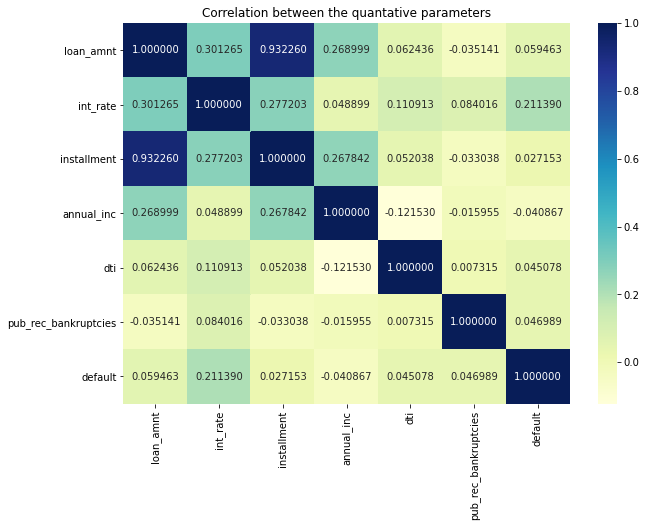

In [162]:
#heatmap to show the correlation
plt.figure(figsize=(10,7))
ax=sns.heatmap(df1,cmap='YlGnBu',annot=True,fmt='f')
ax.set_title("Correlation between the quantative parameters")
plt.show()

# Observation:
#1. interest rate increases with increase in loan amount.
#2. loan amount increases with increase in annual income.
#3. interest rate increases with increase in installment amount.
#4. the default rate increases with the increase in interest rate.
#5. installment amount increases with increase in annual income.
#6. installment amount and loan amount are positivly correlated.
#7. dti(debt to income) and annual income are negativly correlated.
#8. Bankruptcies record is negativly correlated with loan amount, installment amount and annual income.
#9. default rate decreases with increase in annual income.

## Recommendations:

1. People with term of 36 months are less likely to default, so Lending Club should prefer giving loans for 36 months.

2. People with small loan amount are less likely to default, so Lending Club should prefer giving small loans.

3. People getting loan with very high interest rates are more likely to default, so Lending Club should not accept loans with very high interest rate.

4. People with small installment amount are less likely to default, so Lending Club should prefer giving loans with small installment amounts.

5. People falling in "A Grade" are less likely to default. Default rate follow the trend A<B<C<D<E<F<G. So Lending Club prefer giving loans topeople falling in A and B grade.

6. A pearson with smaller annual income is less likely to default, maybe because people with small annaul income do not take that huge risk and their need for loan are also comparitivly small, so Lending Club should prefer to give loan to people with small income.

7. People with verification status as "Verified" are more likely to default.

8. People taking loans for the purpose of "Small Business" are most likely to default, so Lending Club should not prefer these loans.

9. people with no bankruptcies record are less likely to default, so Lending Club should prefer them. 

10. As the dti increases the default rate increases generally.
